# Neural Network for Coupling prediction

## Data preprocessing

Importing the necessary libraries

In [11]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Importing datatset as Pandas dataframe and visualizing the first 5 rows

In [12]:
data = pd.read_csv("Datasets/COMPLETE_FULLDATA.csv",sep=";", decimal='.')
data.head()

,DIMERS,Xshift,Yshift,Zshift,alpha_deg,CPL,1st_exc_en,1st_exc_f,2nd_exc_en,2nd_exc_f,exc_split
0,ND3X0.0,-0.000358,-0.000230,3.0,0,0.006596,1.671243,0.000055,2.039965,0.712887,0.368723
1,ND3X0.2,-0.000358,0.539103,3.0,0,0.006328,1.689789,0.000402,2.040880,0.712912,0.351091
2,ND3X0.4,-0.000358,1.078436,3.0,0,0.005679,1.718518,0.000387,2.031394,0.708976,0.312876
3,ND3X0.6,-0.000358,1.617770,3.0,0,0.004892,1.769175,0.000005,2.034753,0.714190,0.265579
4,ND3X0.8,-0.000358,2.157103,3.0,0,0.004065,1.804709,0.000001,2.026748,0.710577,0.222039


Visualizing dataset dimensions

In [13]:
data.shape

(10560, 11)

Input features and output variable selection

In [14]:
X = data[["Xshift","Yshift","Zshift","alpha_deg"]].values
Y = data["CPL"].values*1000 #meV conversion

Splitting of the data into train set and test set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X.astype(float) ,Y, test_size=0.2)

Scaling of input features

In [16]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Neural Network

Building of the Neural Network architecture

In [17]:
model = Sequential()
model.add(Dense(512, input_shape=(4,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

Configuration of the model for training

In [18]:
model.compile(loss='mse', optimizer='adam')

A brief summary of the model

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2560      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 177,153
Trainable params: 177,153
Non-trai

Number of epochs used for training

In [20]:
num_epochs = 500

Neural Network training

In [21]:
history = model.fit(X_train,y_train,epochs=num_epochs,validation_split = 0.1)

Epoch 1/500
238/238 [==============================] - 3s 5ms/step - loss: 1.4038 - val_loss: 1.0748
Epoch 2/500
238/238 [==============================] - 2s 7ms/step - loss: 1.1216 - val_loss: 1.0132
Epoch 3/500
238/238 [==============================] - 2s 7ms/step - loss: 1.1078 - val_loss: 0.9919
Epoch 4/500
238/238 [==============================] - 1s 3ms/step - loss: 1.0457 - val_loss: 0.9850
Epoch 5/500
238/238 [==============================] - 1s 3ms/step - loss: 0.9895 - val_loss: 1.0190
Epoch 6/500
238/238 [==============================] - 1s 3ms/step - loss: 0.9576 - val_loss: 0.9788
Epoch 7/500
238/238 [==============================] - 1s 6ms/step - loss: 0.9414 - val_loss: 0.8734
Epoch 8/500
238/238 [==============================] - 1s 6ms/step - loss: 0.9032 - val_loss: 0.8141
Epoch 9/500
238/238 [==============================] - 1s 4ms/step - loss: 0.8972 - val_loss: 0.8522
Epoch 10/500
238/238 [==============================] - 1s 3ms/step - loss: 0.8803 - val_lo

# Model Evaluation

In [22]:
#Model testing
test_eval = model.evaluate(X_test, y_test)

66/66 [==============================] - 0s 5ms/step - loss: 0.1344


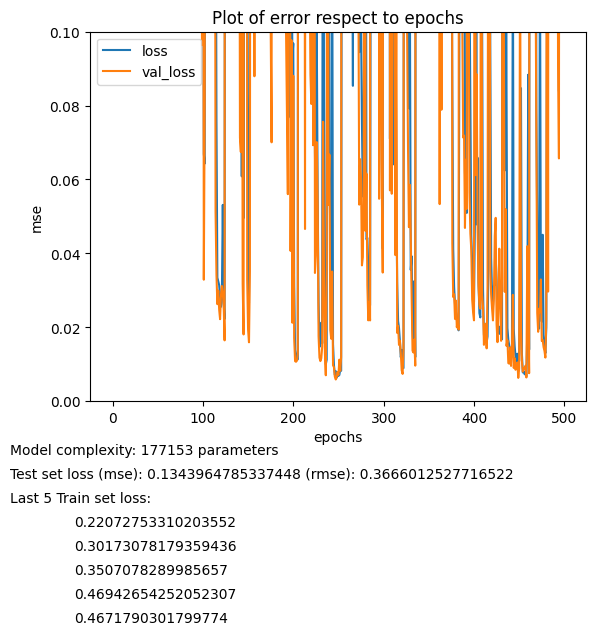

In [23]:
#plotting of training information
plt.plot(range(num_epochs),history.history['loss'])
plt.plot(range(num_epochs),history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.ylabel('mse')
plt.xlabel('epochs')
plt.title('Plot of error respect to epochs')
plt.ylim([0, 1e-1])
plt.figtext(0, 0, "Model complexity: "+str(model.count_params())+" parameters", fontsize=10)
plt.figtext(0, -0.05, "Test set loss (mse): "+str(test_eval)+" (rmse): "+str(math.sqrt(test_eval)), fontsize=10)
plt.figtext(0, -0.1, "Last 5 Train set loss:", fontsize=10)
plt.figtext(0.1, -0.15, str(history.history['loss'][-1]), fontsize=10)
plt.figtext(0.1, -0.2, str(history.history['loss'][-2]), fontsize=10)
plt.figtext(0.1, -0.25, str(history.history['loss'][-3]), fontsize=10)
plt.figtext(0.1, -0.3, str(history.history['loss'][-4]), fontsize=10)
plt.figtext(0.1, -0.35, str(history.history['loss'][-5]), fontsize=10)
plt.show()

# Empirical testing

In this part, model can be evaluated with empirical examples

In [24]:
emp_test = np.array([-2.9219,3.009,4.4996,45])
emp_test = np.reshape(emp_test,(1,4))
#emp_test = ss.transform(emp_test)

In [25]:
model.predict(emp_test)

1/1 [==============================] - 0s 163ms/step


array([[-15.632965]], dtype=float32)

# Scatter plot

In [26]:
#Function that returns all the predictions of train set into a list
def predictions(X_test):
    pred = []

    for i in range(0,X_test.shape[0]):
        k = X_test[i]
        k = np.reshape(k,(1,4))
        #k = ss.transform(k)
        pred.append(float(model.predict(k))) 
    return pred

In [27]:
pred = predictions(X_test)

1/1 [==============================] - 0s 22ms/step


In [28]:
#mse test(to check if predictions are good)
mse = (y_test-pred)**2
np.sum(mse)/mse.shape[0]

0.134396481749103

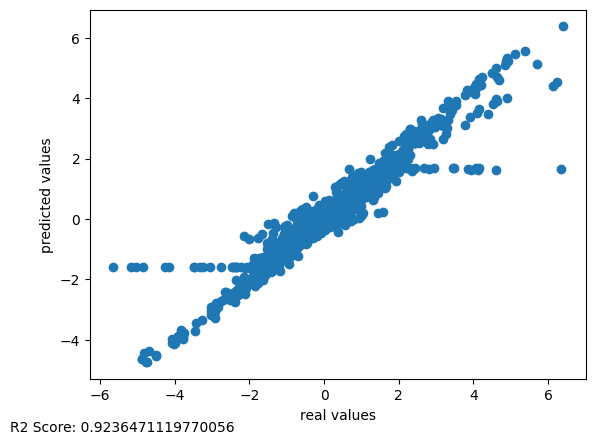

In [29]:
#scatter plot and r2 score
import sklearn
sklearn.metrics.r2_score(y_test,pred)

plt.scatter(y_test,pred)
plt.ylabel('predicted values')
plt.xlabel('real values')
plt.figtext(0, 0, "R2 Score: "+str(sklearn.metrics.r2_score(y_test,pred)), fontsize=10)
plt.show()

# Saving model

In [30]:
model.save('CPL_meV.h5')

In [31]:
from keras.models import load_model
model2 = load_model('CPL_meV.h5')

In [32]:
def predictions(X_test):
    pred = []

    for i in range(0,X_test.shape[0]):
        k = X_test[i]
        k = np.reshape(k,(1,4))
        #k = ss.transform(k)
        pred.append(float(model2.predict(k))) 
    return pred

In [33]:
pred = predictions(X_test)

1/1 [==============================] - 0s 57ms/step


In [34]:
#mse test(to check if predictions are good)
mse = (y_test-pred)**2
np.sum(mse)/mse.shape[0]

0.134396481749103

In [35]:
!pip install pandoc

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
                                              0.0/126.7 kB ? eta -:--:--
     ---------                               30.7/126.7 kB 1.3 MB/s eta 0:00:01
     ------------------------------------   122.9/126.7 kB 1.8 MB/s eta 0:00:01
     ------------------------------------   122.9/126.7 kB 1.8 MB/s eta 0:00:01
     ------------------------------------ 126.7/126.7 kB 826.3 kB/s eta 0:00:00
                                              0.0/49.6 kB ? eta -:--:--
     ---------------------------------        41.0/49.6 kB 2.0 MB/s eta 0:00:01
     -------------------------------------- 49.6/49.6 kB 634.3 kB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.3-py3-none-any.whl size=33288 sha256=73b42450a9888ef375ff144754e1a7b36bcadaf4e07fe62f4b67c2104586d788
  Stored in directory: c:\users\emace\appdata\local\pip\cache\wheels\1c\a9\c4\6254542c4e8202d52fcd69798d2507aaad1f2a4bb60f2f0